In [1]:
library(deSolve)

### 2. Gene production rate

In [2]:
circuit <- function(t, state, params){
  with(as.list(c(state, params)),{
    dX = beta * (sign(Kzx - Z) + 1) / 2 - X
    dY = beta * (sign(Kxy - X) + 1) / 2 - Y
    dZ = beta * (sign(Kyz - Y) + 1) / 2 - Z
    list(c(dX, dY, dZ))
  })
}

In [3]:
plot_circuit <- function(Xst=0, Yst=1, Zst=0, kxy=0.5, kyz=0.5, kzx=0.5, bta=1){
    state <- c(X = Xst, Y = Yst, Z = Zst)
    params <- c(Kxy = kxy, Kyz = kyz, Kzx = kzx, beta = bta)
    times <- seq(0, 10, by = 0.01)
    out <- ode(y = state , times = times , func = circuit , parms = params)
    result <- data.frame(out)
    plot(times , result$X, ylim = c(0, 1), xlab = "time", ylab = "concentration", col = "red", type = "o")
    title(main = paste0("Circuit Dynamics , beta = ", bta))
    lines(times , result$Y, type = "o", col = "green")
    lines(times , result$Z, type = "o",col = "blue")
    legend("bottomright",pch=c(15,15), legend=c("X", "Y", "Z"), col=c("red","green", "blue"))
}

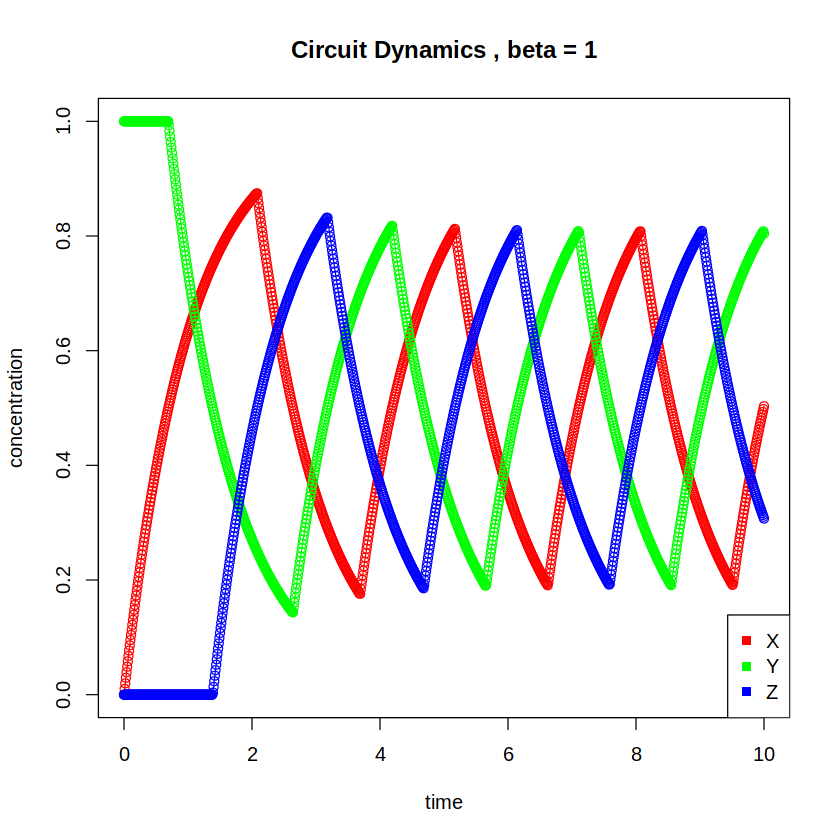

In [4]:
plot_circuit(Xst=0, Yst=1, Zst=0, kxy=0.5, kyz=0.5, kzx=0.5, bta=1)

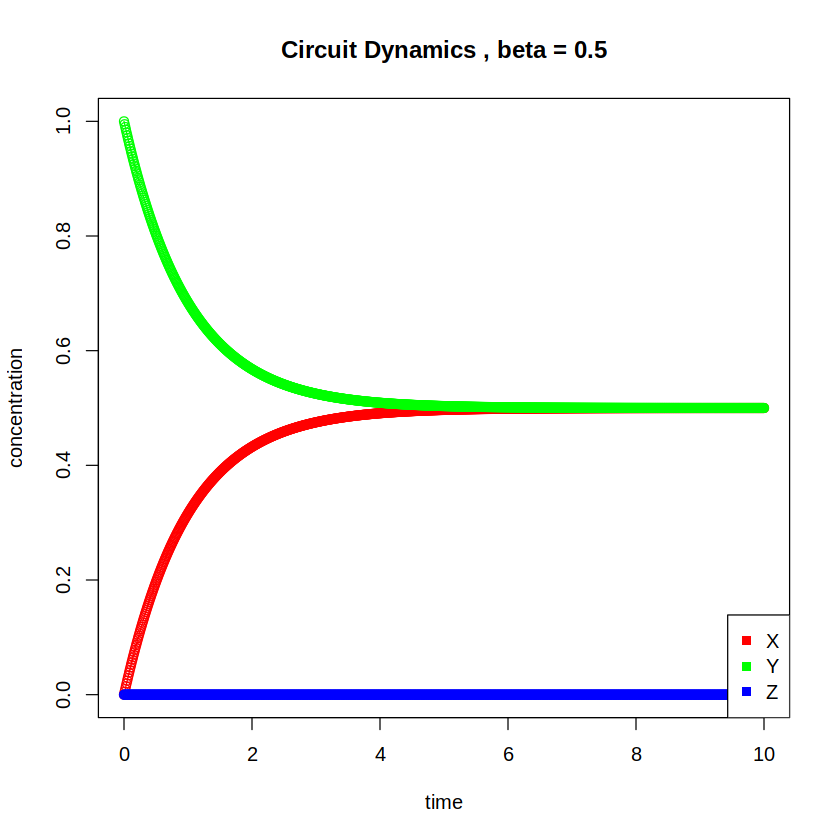

In [5]:
plot_circuit(Xst=0, Yst=1, Zst=0, kxy=0.5, kyz=0.5, kzx=0.5, bta=0.5)

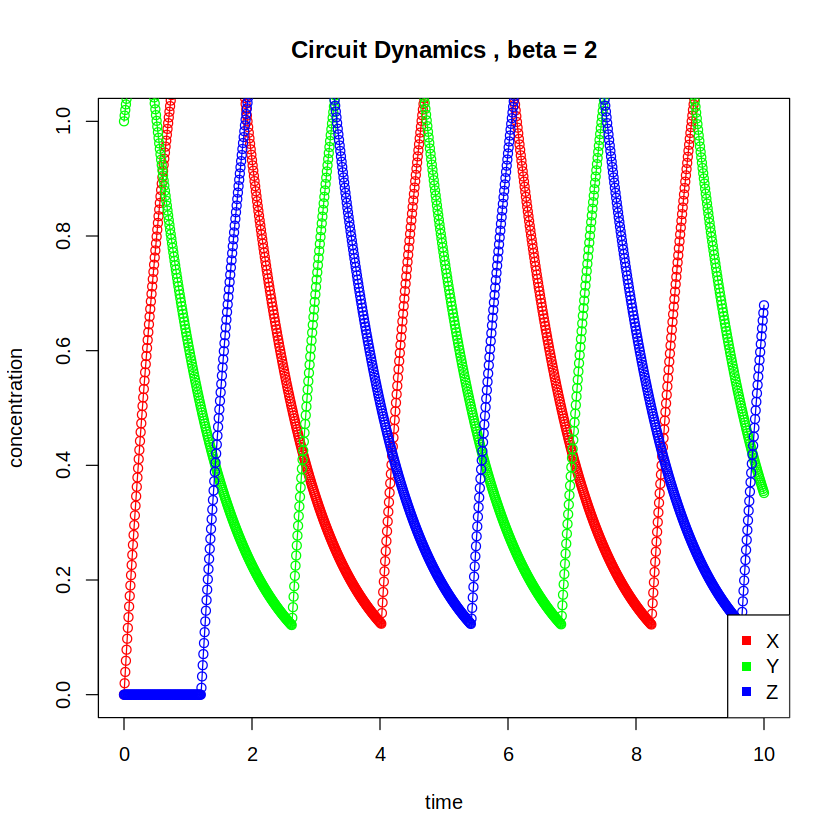

In [6]:
plot_circuit(Xst=0, Yst=1, Zst=0, kxy=0.5, kyz=0.5, kzx=0.5, bta=2)

### 3. Autocatalytic reaction-1

In [7]:
library(phaseR)

-------------------------------------------------------------------------------
phaseR: Phase plane analysis of one- and two-dimensional autonomous ODE systems
-------------------------------------------------------------------------------

v.2.1: For an overview of the package's functionality enter: ?phaseR

For news on the latest updates enter: news(package = "phaseR")



In [8]:
autocatalytic <- function(t, state, params){
  with(as.list(c(state, params)),{
    ds1 = k0-k1*(1+(s2/k)^n)*s1
    ds2 = k1*(1+(s2/k)^n)*s1-k2*s2
    list(c(ds1, ds2))
    return(list(c(ds1, ds2)))
  })
}

In [9]:
plot_autocatalytic <- function(s1_st = 3, s2_st = 0, k_0 = 8, k_1 = 1, k_ = 1, k_2 = 5, n_ = 2){
    state <- c(s1=s1_st,s2=s2_st)
    parameters <- c(k0=k_0, k1=k_1, k=k_, k2=k_2, n=n_)
    times <- seq(0, 10, by = 0.01)

    out <- ode(y = state , times = times , func = autocatalytic , parms = parameters)
    result <- data.frame(out)
    plot(times , result$s1, ylim = c(0, 5), xlab = "time", ylab = "concentration", col = "red", type = "o")
    title(main = paste0("autocatalytic reaction, n = ", n_))
    lines(times , result$s2, type = "o",col = "green")
    legend("bottomright",pch=c(15,15), legend=c("s1", "s2"), col=c("red","green"))
}

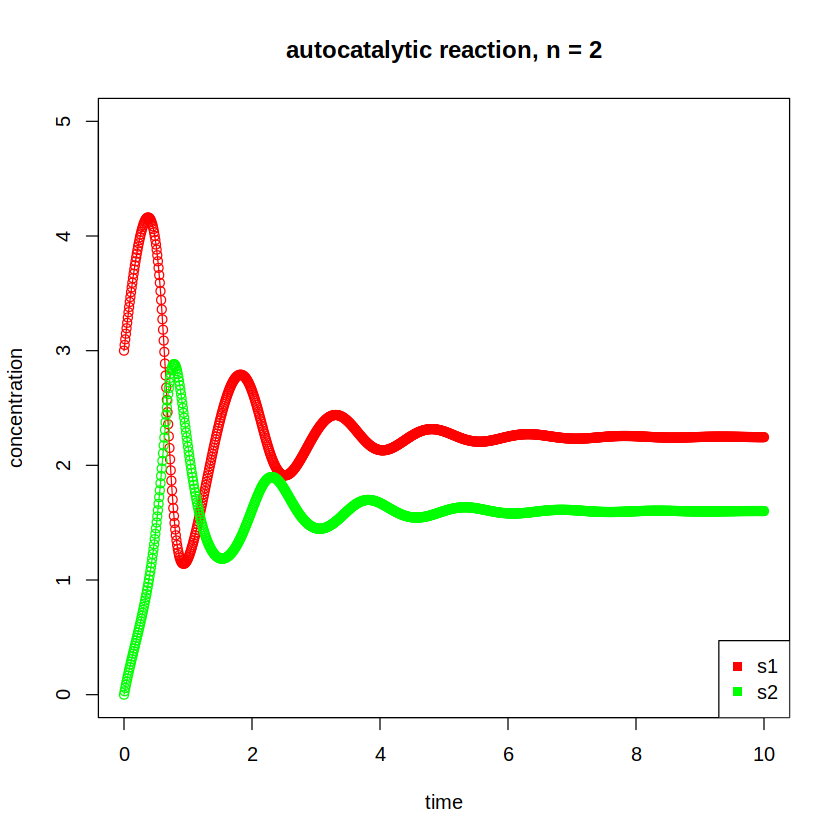

In [10]:
plot_autocatalytic(s1_st = 3, s2_st = 0, k_0 = 8, k_1 = 1, k_ = 1, k_2 = 5, n_ = 2)

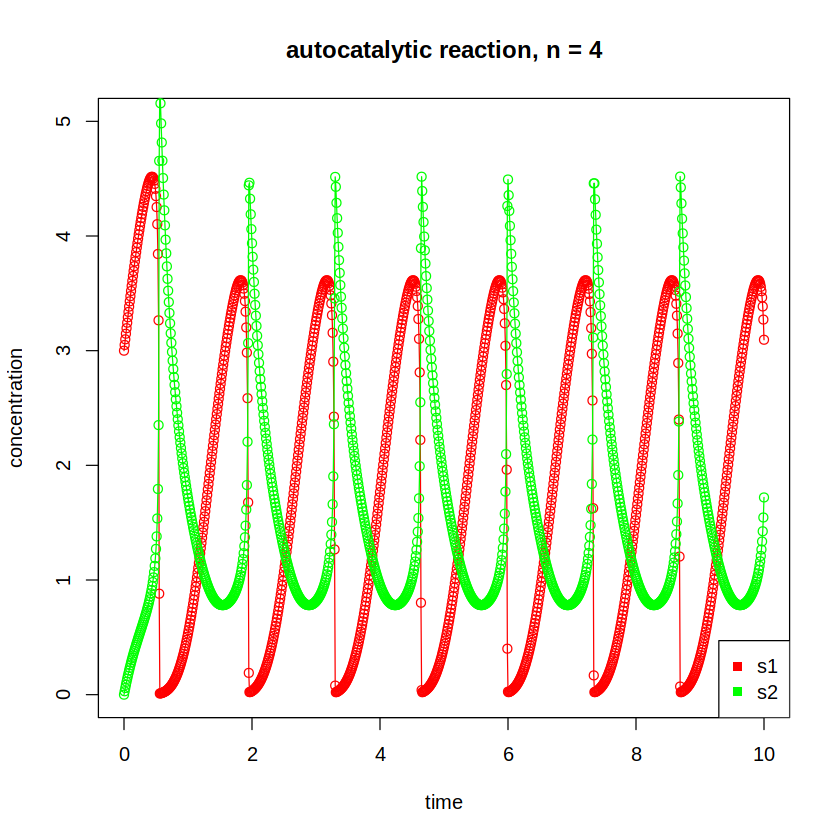

In [19]:
plot_autocatalytic(s1_st = 3, s2_st = 0, k_0 = 8, k_1 = 1, k_ = 1, k_2 = 5, n_ = 4)

### 5. Fit Hill coefficient

In [21]:
beta <- 1
k1n <- 1
k2 <- 1
Tt <- 1
A <- c(250,125,62.5,31.25,15.63,7.81,3.91,1.95,0.98,0.49,0.24,0)
rep1 <- c(1.663730444,1.642508499,1.634603977,1.474643981,1.221032709,0.954770548,0.756847776,0.499082112,0.303049472,0.159294266,0.168274852,0.029273336)
rep2 <- c(1.705202719,1.703928321,1.68565465,1.52939741,1.233350079,1.029436589,0.745283948,0.519201647,0.37509262,0.200986122,0.21800774,0.028016163)
rep3 <- c(1.646943497,1.674241748,1.614997693,1.453821483,1.261843052,1.027525154,0.799553708,0.583721475,0.375219825,0.194906403,0.222237264,0.027762281)
rep4 <- c(1.793533925,1.649687036,1.65903207,1.462781178,1.257643327,1.075817238,0.865413181,0.610273345,0.393203068,0.22655302,0.265900816,0.024171742)
times <- seq(0, 20, by=0.1)
coefficient <- seq(1, 4, by=1)

In [22]:
simple_gene_regulation <- function(t, state , parameters){
  with(as.list(c(state , parameters)),{
    dY = beta - alpha * Y
    list(dY)
    })
  }

In [23]:
steady <- c()
for (i in 1:length(coefficient)){
  steady_ <- c()
  for (j in 1:length(A)){
    num <- beta * k2
    den <- k1n * Tt / (A[j]^coefficient[i] + k1n) + k2
    activity <- num / den
    parameters <- c(beta = activity , alpha = 1)
    state <- c(Y = A[j])
    out <- ode(y = state , times = times ,
               func = simple_gene_regulation , parms = parameters)
    steady_ <- c(steady_, data.frame(out)$Y[length(times)])
  }
  steady <- rbind(steady , steady_)
}

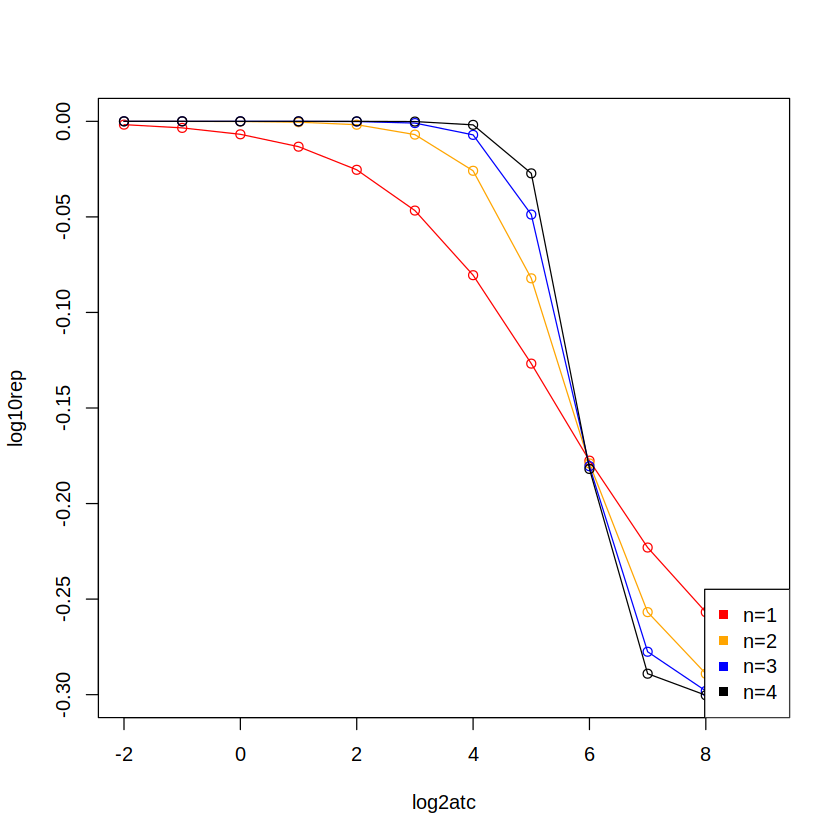

In [25]:
log2atc <- seq(-2,9, by=1)
log10rep <- data.frame(log10(steady))
plot(log2atc , log10rep[1,], ylim = c(-0.3, 0),
     ylab = "log10rep", type = "o", col = "red")
lines(log2atc , log10rep[2,], type = "o", col = "orange")
lines(log2atc , log10rep[3,], type = "o", col = "blue")
lines(log2atc , log10rep[4,], type = "o", col = "black")
legend("bottomright",pch=c(15,15),
       legend=c("n=1", "n=2", "n=3", "n=4"),
       col=c("red","orange", "blue", "black"))

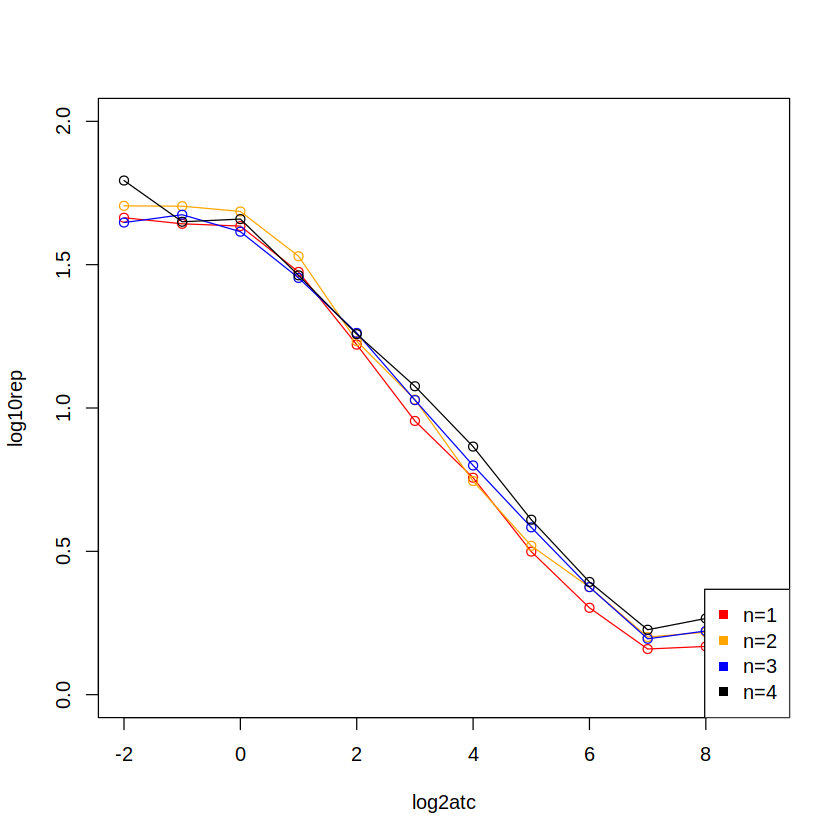

In [26]:
plot(log2atc , rep1, ylim = c(0, 2),
     ylab = "log10rep", type = "o", col = "red")
lines(log2atc , rep2, type = "o", col = "orange")
lines(log2atc , rep3, type = "o", col = "blue")
lines(log2atc , rep4, type = "o", col = "black")
legend("bottomright",pch=c(15,15),
       legend=c("n=1", "n=2", "n=3", "n=4"),
       col=c("red","orange", "blue", "black"))